In [2]:
%%capture
%run EOMs.ipynb
from scipy.optimize import fsolve

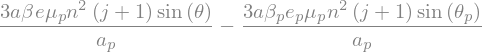

In [3]:
ndot

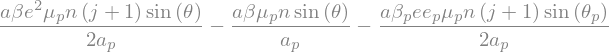

In [4]:
edot

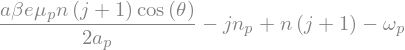

In [5]:
thpdot

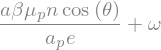

In [6]:
pomdot

In [36]:
Dpom = symbols(r"\Delta\varpi")
Dpom

# $\theta_p$ circulating, $\theta$ fixed to non-zero/pi value, $\omega=\omega_p=0$

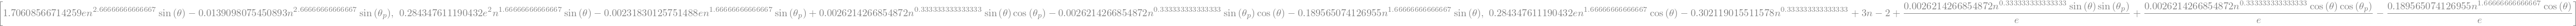

In [16]:
convs = {a: n ** (2.0 / 3), pom: omp * t + thp - th}
params = {
    j: 2,
    mup: 1e-1,
    bp: 1.5455341716765871,
    b: 1.8956507412695471,
    b1_3_2: 12.08476062046314,
    b2_3_2: 10.485706741948807,
    np: 1,
    ap: 1,
    ep: 0.01,
    omp: 0.000,
    om: 0.000,
}

alpha0val = (params[j] / (params[j] + 1)) ** (2.0 / 3)

funs = [
    expand_trig(iterfun.subs(convs).subs(params)).expand()
    for iterfun in [ndot, edot + edsec, (thpdot + omp - pomdot - pomdsec)]
]
funs

Here we assume $\cos\theta_p$ and $\sin\theta_p$ average to zero

In [17]:
funs = [iterfun.subs({cos(thp): 0, sin(thp): 0}) for iterfun in funs]

**I think the problem could be here:** are these linearly independent constraints bc of $\sin(\theta)$ in the first 2?

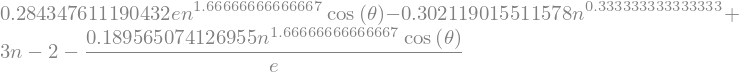

In [18]:
for fun in funs:
    display(fun)

In [13]:
_func = lambdify([n,e,th],funs)
def _f(y):
    return _func(*y)

## Dependence on initial guesses (are there multiple equilibria?)

See above, this is due likely to Eqs not being LI

In [14]:
init_ths = npy.linspace(0,2*npy.pi,100)
eqs_n = []
eqs_e = []
eqs_th = []
for init_th in init_ths:
    eq = fsolve(_f, [0.7, 0.01, init_th],xtol=1e-16)
    eqs_n += [eq[0]]
    eqs_e += [eq[1]]
    eqs_th += [eq[2]]

/Users/jtlaune/micromamba/envs/Science/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


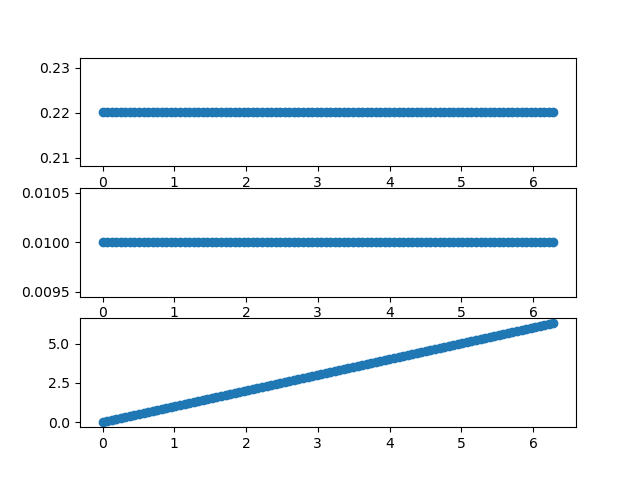

In [15]:
fig, ax= plt.subplots(3)
ax[0].scatter(init_ths,eqs_n)
ax[1].scatter(init_ths,eqs_e)
ax[2].scatter(init_ths,eqs_th)

I think this is a numerical artifact or error, because it depends on the initial guess for $e$, i.e. solutions for $e_0=0.1$ are near $0.1$, and $e_0=0.01$ are near $0.01$. Maybe this is a relic of setting the parameter k or something in the Hamiltonian? I don't know. But if you also look at the equations, $e_p$ disappears in this treatment. Overall I am skeptical that this is a true thing here in this treatment.

But this raises the further question of why i can't find equilibrium here?

Maybe $\cos\theta_p$ and $\sin\theta_p$ don't average to zero?

Others to try:
- $\theta_p-\theta$ locked
- $\theta_p$ locked and $\theta$ circulating

# $\theta_p$ circulating, $\theta-\theta_p$ fixed to non-zero/pi value

**Need to make sure functions are correct in each of these sections!!!**

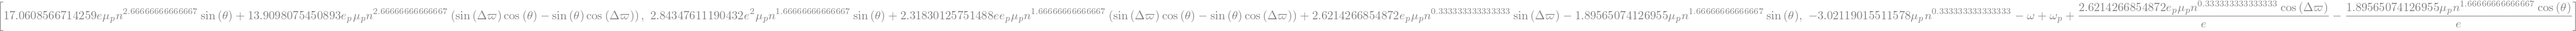

In [112]:
convs = {a: n ** (2.0 / 3), pom: omp * t + thp - th}
params = {
    j: 2,
    #mup: 1e-1,
    bp: 1.5455341716765871,
    b: 1.8956507412695471,
    b1_3_2: 12.08476062046314,
    b2_3_2: 10.485706741948807,
    np: 1,
    ap: 1,
    #ep: 0.01,
    #omp: 0.00,
    #om: 0.000,
}

alpha0val = (params[j] / (params[j] + 1)) ** (2.0 / 3)

funs = [
    expand_trig(iterfun.subs(convs).subs(params).expand().subs({thp: th-Dpom}))
    for iterfun in [ndot, edot + edsec, (omp - pomdot - pomdsec)]
]
funs

Here we assume $\cos\theta_p$ and $\sin\theta_p$ average to zero and $\theta=\pi$

In [113]:
funs = [iterfun.subs({cos(thp): 0, sin(thp): 0, th:pi}) for iterfun in funs]

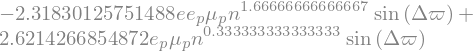

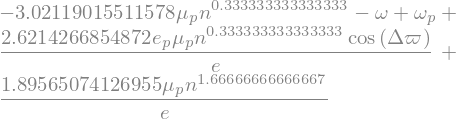

In [114]:
for fun in funs:
    display(fun)

Then $\Delta\varpi=0,\pi$

And get one equation, 2 unknowns. For now $n$ is a free parameter?

So for now try $n\simeq j/j+1)$? and set $\omega=0$ quick & dirty

In [128]:
Dom = symbols(r"\Delta\omega_{\rm\ ext}")
Dom

$\Delta\varpi=0$ numerically corresponds to capture

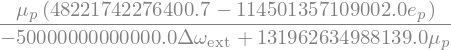

In [145]:
_expr = solve(funs[2].subs({n:params[j]/(params[j]+1)}),e)[0].simplify()
__ = (_expr.subs({omp:Dom+om})).subs({Dpom:pi})
_f = lambdify([ep,Dom],__.subs({mup:5e-5}))
__

In [151]:
solve(numer(__),ep)

In [153]:

solve(denom(__),Dom)

I think this is something. Maybe this combined with the $\Phi$ constraint on capture, $e_p\approx\mu_p^{1/3}$?

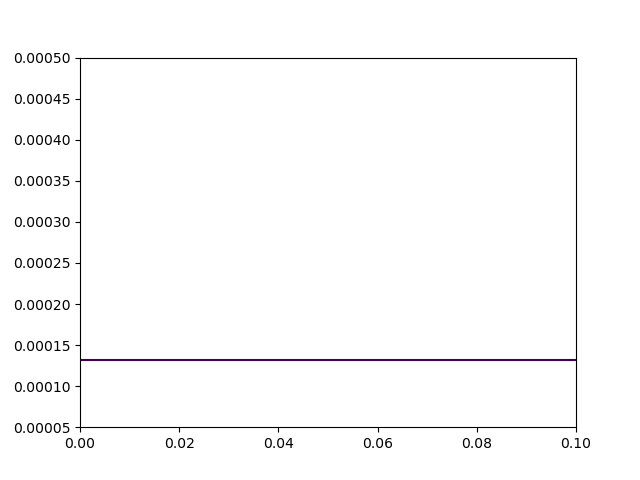

In [152]:
plt.clf()
x, y = npy.meshgrid(npy.linspace(0,0.1,1000),npy.linspace(0.00005,0.0005,1000))
plt.contour(x, y, _f(x,y),levels=[0])
plt.show()

In [125]:
numer(_expr)

In [126]:
denom(_expr)/5e13

In [118]:
_func = lambdify(funs[2].subs({n:params[j]/(params[j]+1)}))
def _f(y):
    return()

TypeError: lambdify() missing 1 required positional argument: 'expr'